## Globalization and Innovation Cycles

These solutions are written by [Chase Coleman](github.com/cc7768)

In [1]:
from simulate_matsuyama import *
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def plot_attraction_basis(s1=0.5, theta=2.5, delta=0.7, rho=0.2, npts=250, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Create attraction basis
    unitrange = np.linspace(0, 1, npts)
    model = MSGSync(s1, theta, delta, rho)
    ab = model.create_attraction_basis(npts=npts)
    cf = ax.pcolormesh(unitrange, unitrange, ab, cmap="viridis")

    return ab, cf

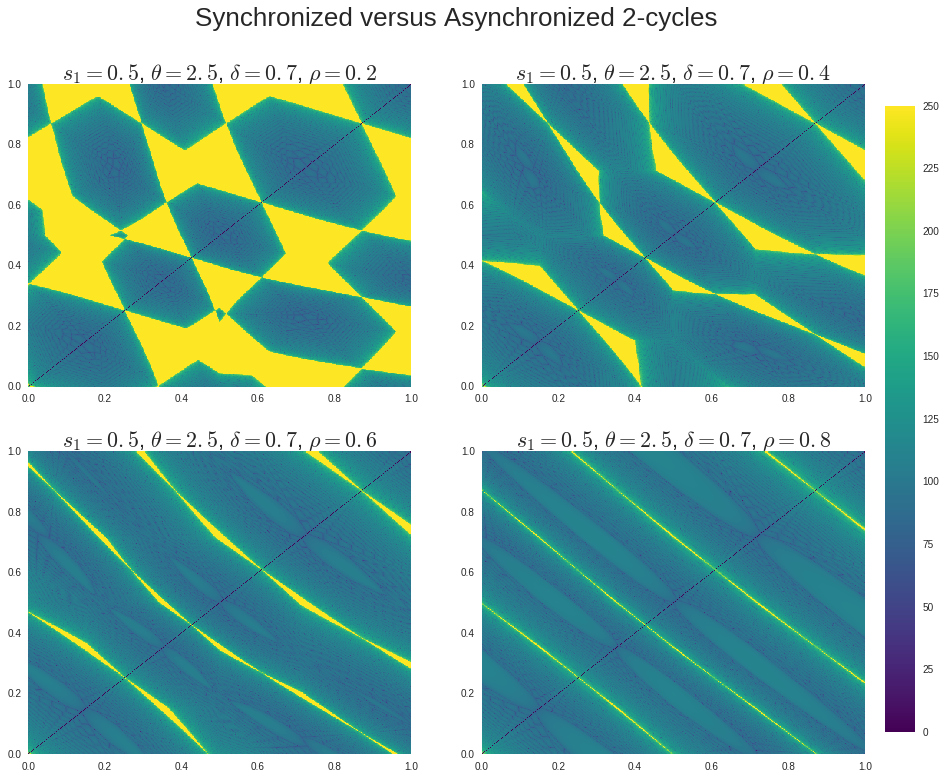

In [4]:
fig = plt.figure(figsize=(14, 12))

# Left - Bottom - Width - Height
ax0 = fig.add_axes((0.05, 0.475, 0.38, 0.35), label="axes0")
ax1 = fig.add_axes((0.5, 0.475, 0.38, 0.35), label="axes1")
ax2 = fig.add_axes((0.05, 0.05, 0.38, 0.35), label="axes2")
ax3 = fig.add_axes((0.5, 0.05, 0.38, 0.35), label="axes3")

params = [[0.5, 2.5, 0.7, 0.2],
          [0.5, 2.5, 0.7, 0.4],
          [0.5, 2.5, 0.7, 0.6],
          [0.5, 2.5, 0.7, 0.8]]

ab0, cf0 = plot_attraction_basis(*params[0], npts=500, ax=ax0)
ab1, cf1 = plot_attraction_basis(*params[1], npts=500, ax=ax1)
ab2, cf2 = plot_attraction_basis(*params[2], npts=500, ax=ax2)
ab3, cf3 = plot_attraction_basis(*params[3], npts=500, ax=ax3)

cbar_ax = fig.add_axes([0.9, 0.075, 0.03, 0.725])
plt.colorbar(cf0, cax=cbar_ax)

ax0.set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.2$",
              fontsize=22)
ax1.set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.4$",
              fontsize=22)
ax2.set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.6$",
              fontsize=22)
ax3.set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.8$",
              fontsize=22)

fig.suptitle("Synchronized versus Asynchronized 2-cycles",
             x=0.475, y=0.915, size=26)


## Interactive Version

Additionally, instead of just seeing 4 plots at once, we might want to manually be able to change $\rho$ and see how it affects the plot in real time. Below we use an interactive plot to do this

In [5]:
from ipywidgets import interact

In [6]:
def interact_attraction_basis(rho=0.2, maxiter=250, npts=250):
    # Create the figure and axis that we will plot on
    fig, ax = plt.subplots(figsize=(12, 10))

    # Create model and attraction basis
    s1, theta, delta = 0.5, 2.5, 0.75
    model = MSGSync(s1, theta, delta, rho)
    ab = model.create_attraction_basis(maxiter=maxiter, npts=npts)

    # Color map with colormesh
    unitrange = np.linspace(0, 1, npts)
    cf = ax.pcolormesh(unitrange, unitrange, ab, cmap="viridis")
    cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
    plt.colorbar(cf, cax=cbar_ax)

    return None


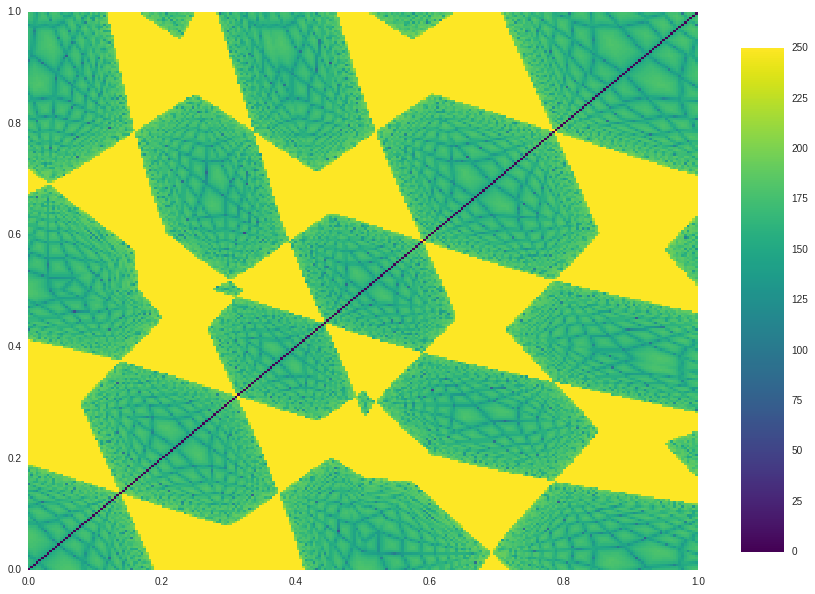

In [7]:
fig = interact(interact_attraction_basis,
               rho=(0.0, 1.0, 0.05),
               maxiter=(50, 5000, 50),
               npts=(25, 750, 25))